In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.models import Sequential
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170500096/170498071 [==============================] - 11s 0us/step


In [0]:

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

In [0]:
from keras.layers import Conv2D, MaxPooling2D

In [5]:
model = Sequential()
num_classes =10
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=train_images.shape[1:]))
model.add(Activation('tanh'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('tanh'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('tanh'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('tanh'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('tanh'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))


In [6]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
activation_3 (Activation)    (None, 15, 15, 64)       

In [10]:
import numpy as np
from sklearn.metrics import classification_report , confusion_matrix, multilabel_confusion_matrix


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, batch_size=64,
                    validation_data=(test_images, test_labels))
y_pred=model.predict_classes(test_images)
yTest_priginal = np.argmax(test_labels,axis=1)
print(classification_report(test_labels,y_pred))
print(confusion_matrix(y_true=test_labels,y_pred=y_pred))


Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 14s 290us/step - loss: 0.0952 - acc: 0.9667 - val_loss: 1.7886 - val_acc: 0.6885
Epoch 2/10
50000/50000 [==============================] - 14s 276us/step - loss: 0.0739 - acc: 0.9740 - val_loss: 1.8448 - val_acc: 0.6817
Epoch 3/10
50000/50000 [==============================] - 14s 275us/step - loss: 0.0981 - acc: 0.9656 - val_loss: 1.8517 - val_acc: 0.6800
Epoch 4/10
50000/50000 [==============================] - 14s 282us/step - loss: 0.0884 - acc: 0.9690 - val_loss: 1.8110 - val_acc: 0.6846
Epoch 5/10
50000/50000 [==============================] - 14s 275us/step - loss: 0.0845 - acc: 0.9700 - val_loss: 1.8430 - val_acc: 0.6823
Epoch 6/10
50000/50000 [==============================] - 14s 276us/step - loss: 0.0809 - acc: 0.9711 - val_loss: 1.7758 - val_acc: 0.6888
Epoch 7/10
50000/50000 [==============================] - 14s 275us/step - loss: 0.0752 - acc: 0.9731 - val_loss: 1.

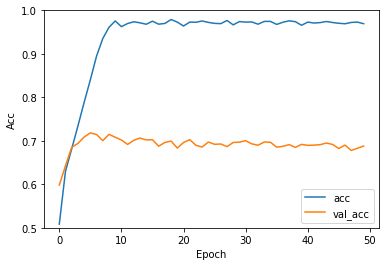

In [8]:
plt.plot(history.history['acc'], label='acc')
plt.plot(history.history['val_acc'], label = 'val_acc')
plt.xlabel('Epoch')
plt.ylabel('Acc')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [9]:
print(test_acc)

0.6882
